In [131]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import patsy
from statsmodels.graphics.correlation import plot_corr
from sklearn.model_selection import train_test_split
plt.style.use("seaborn")

In [132]:
raw_data=pd.read_csv("HousingData.csv")
raw_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [133]:
raw_data.empty

False

In [134]:
raw_data.shape

(506, 14)

In [135]:
raw_data.describe(percentiles=[0.5,0.75,0.2])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
20%,0.062630,0.000000,4.390000,0.000000,0.442000,5.837000,38.100000,1.951200,4.000000,273.000000,16.600000,364.310000,6.360000,15.300000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [136]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [137]:
raw_data=raw_data.dropna()

In [138]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  MEDV     394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB


In [139]:
raw_data.shape

(394, 14)

In [140]:
raw_data=raw_data.drop_duplicates()

In [141]:
raw_data.shape

(394, 14)

In [142]:
list(raw_data.columns)

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

In [143]:
renamedRawData=raw_data.rename(columns={"CRIM":"crimeRatePerCapita", "ZN":"landOver25k_sqrt",
                         "INDUS":"non-retailLandProptn","CHAS":"riverDummy",
                          "NOX":"nitriOxide_pp10m","RM":"AvgNo.RoomsPerDwelling",
                         "AGE":"ProptnOwnerOccupied","DIS":"weightedDist",
                         "RAD":"radialHighwaysAccess","TAX":"propTaxRate_per10k",
                         "PTRATIO":"pupilTeacherRatio","LSTAT":"pctLowerStatus",
                         "MEDV":"medianValue_Ks"})

In [144]:
renamedRawData.head()

,crimeRatePerCapita,landOver25k_sqrt,non-retailLandProptn,riverDummy,nitriOxide_pp10m,AvgNo.RoomsPerDwelling,ProptnOwnerOccupied,weightedDist,radialHighwaysAccess,propTaxRate_per10k,pupilTeacherRatio,B,pctLowerStatus,medianValue_Ks
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [145]:
(list(renamedRawData.columns))

['crimeRatePerCapita',
 'landOver25k_sqrt',
 'non-retailLandProptn',
 'riverDummy',
 'nitriOxide_pp10m',
 'AvgNo.RoomsPerDwelling',
 'ProptnOwnerOccupied',
 'weightedDist',
 'radialHighwaysAccess',
 'propTaxRate_per10k',
 'pupilTeacherRatio',
 'B',
 'pctLowerStatus',
 'medianValue_Ks']

In [146]:
 del renamedRawData["B"]

In [147]:
list(renamedRawData.columns)

['crimeRatePerCapita',
 'landOver25k_sqrt',
 'non-retailLandProptn',
 'riverDummy',
 'nitriOxide_pp10m',
 'AvgNo.RoomsPerDwelling',
 'ProptnOwnerOccupied',
 'weightedDist',
 'radialHighwaysAccess',
 'propTaxRate_per10k',
 'pupilTeacherRatio',
 'pctLowerStatus',
 'medianValue_Ks']

In [148]:
x=renamedRawData.drop("crimeRatePerCapita",axis=1)

In [149]:
x

,landOver25k_sqrt,non-retailLandProptn,riverDummy,nitriOxide_pp10m,AvgNo.RoomsPerDwelling,ProptnOwnerOccupied,weightedDist,radialHighwaysAccess,propTaxRate_per10k,pupilTeacherRatio,pctLowerStatus,medianValue_Ks
0,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,15.10,17.5
500,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,14.33,16.8
502,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9


In [150]:
y=renamedRawData.loc[:,["crimeRatePerCapita"]]

In [151]:
 y

,crimeRatePerCapita
0,0.00632
1,0.02731
2,0.02729
3,0.03237
5,0.02985
...,...
499,0.17783
500,0.22438
502,0.04527
503,0.06076


In [152]:
seed=10
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=seed)

In [153]:
train_data=pd.concat([x_train,y_train])

test_data=pd.concat([x_test,y_test],axis=1)


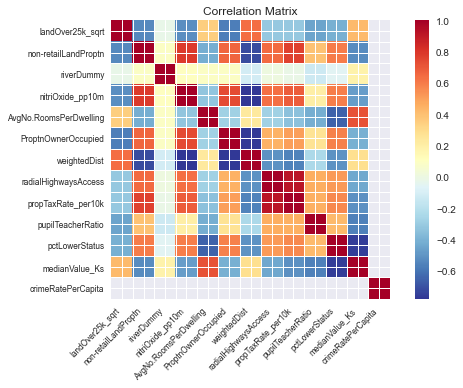

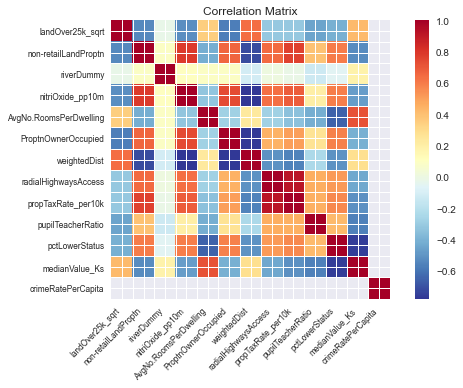

In [154]:
corrMatrix=train_data.corr(method="pearson")
xnames=list(train_data.columns)
ynames=list(train_data.columns)
plot_corr(corrMatrix,ynames=ynames,xnames=xnames)

In [155]:
corrMatrix=train_data.corr(method="pearson")
corrMatrix

,landOver25k_sqrt,non-retailLandProptn,riverDummy,nitriOxide_pp10m,AvgNo.RoomsPerDwelling,ProptnOwnerOccupied,weightedDist,radialHighwaysAccess,propTaxRate_per10k,pupilTeacherRatio,pctLowerStatus,medianValue_Ks,crimeRatePerCapita
landOver25k_sqrt,1.000000,-0.526697,-0.017627,-0.515744,0.351774,-0.566690,0.640157,-0.308214,-0.307552,-0.444938,-0.406577,0.417688,NaN
non-retailLandProptn,-0.526697,1.000000,0.091742,0.786676,-0.413972,0.660830,-0.707386,0.647614,0.764479,0.392982,0.603292,-0.522789,NaN
riverDummy,-0.017627,0.091742,1.000000,0.107136,0.095979,0.092228,-0.105578,0.010236,-0.010914,-0.125997,-0.049575,0.183617,NaN
nitriOxide_pp10m,-0.515744,0.786676,0.107136,1.000000,-0.322846,0.737792,-0.775427,0.633718,0.688505,0.206122,0.591952,-0.466183,NaN
AvgNo.RoomsPerDwelling,0.351774,-0.413972,0.095979,-0.322846,1.000000,-0.274520,0.233993,-0.272660,-0.338119,-0.410263,-0.643815,0.717016,NaN
ProptnOwnerOccupied,-0.566690,0.660830,0.092228,0.737792,-0.274520,1.000000,-0.767567,0.450427,0.504034,0.269833,0.587143,-0.407638,NaN
weightedDist,0.640157,-0.707386,-0.105578,-0.775427,0.233993,-0.767567,1.000000,-0.499214,-0.550206,-0.238477,-0.503076,0.289559,NaN
radialHighwaysAccess,-0.308214,0.647614,0.010236,0.633718,-0.272660,0.450427,-0.499214,1.000000,0.921792,0.462893,0.518888,-0.431708,NaN
propTaxRate_per10k,-0.307552,0.764479,-0.010914,0.688505,-0.338119,0.504034,-0.550206,0.921792,1.000000,0.454116,0.566322,-0.506276,NaN
pupilTeacherRatio,-0.444938,0.392982,-0.125997,0.206122,-0.410263,0.269833,-0.238477,0.462893,0.454116,1.000000,0.422228,-0.554674,NaN


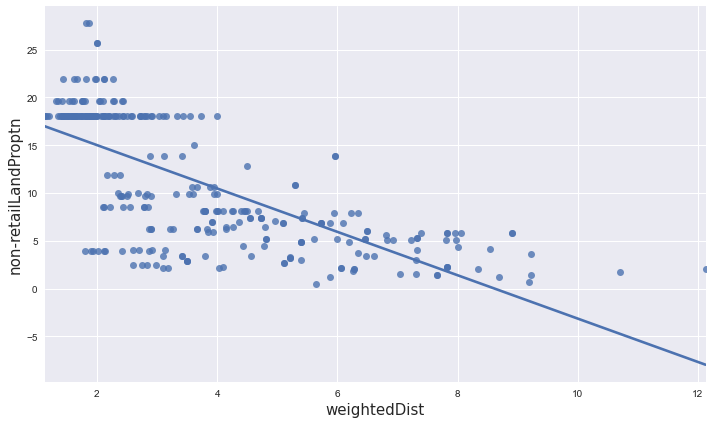

In [168]:
fig,ax=plt.subplots(figsize=(10,6))
sns.regplot(x="weightedDist",y="non-retailLandProptn",
           ci=None,data=train_data,ax=ax)
ax.set_ylabel("non-retailLandProptn",fontsize=15,
              fontname="DejaVu Sans")
ax.set_xlabel("weightedDist",fontsize=15,
              fontname="DejaVu Sans")
fig.tight_layout()

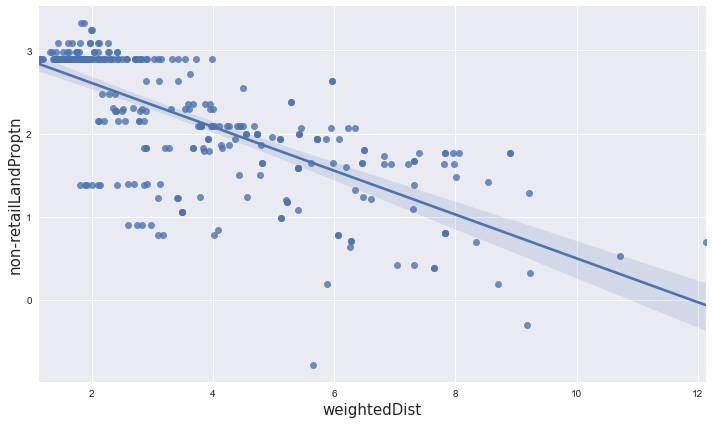

In [169]:
fig,ax=plt.subplots(figsize=(10,6))
y=np.log(train_data["non-retailLandProptn"])
sns.regplot(x="weightedDist",y=y,
            data=train_data,ax=ax,ci=95)
ax.set_ylabel("non-retailLandProptn",fontsize=15,
              fontname="DejaVu Sans")
ax.set_xlabel("weightedDist",fontsize=15,
              fontname="DejaVu Sans")
fig.tight_layout()